<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/AlexNet_%2B_without_canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing the necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train'
valid_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/test'

In [ ]:
import os
import shutil
import random

train_dir = os.path.join(train_dataset, "")
val_dir = os.path.join(valid_dataset, "")
test_dir = os.path.join(test_dataset, "")
categories = ["normal", "cancer"]
target_val_size = 2643
target_test_size = 2643

## Validation dataset splitting
current_total_val = sum(len(os.listdir(os.path.join(val_dir, cat))) for cat in categories)
images_needed_val = max(0, target_val_size - current_total_val)

if images_needed_val == 0:
    print("Validation dataset is now splitted")
else:
    moved_count_val = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        val_path = os.path.join(val_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_val = min(images_needed_val // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_val):
            shutil.move(os.path.join(train_path, image), os.path.join(val_path, image))
            moved_count_val += 1
            print(f"Moved {images_to_move_val} images to '{val_path}'")
print("Validation image movement is now complete")

## Testing dataset splitting
current_total_test = sum(len(os.listdir(os.path.join(test_dir, cat))) for cat in categories)
images_needed_test = max(0, target_test_size - current_total_test)

if images_needed_test == 0:
    print("Testing dataset is now splitted")
else:
    moved_count_test = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        test_path = os.path.join(test_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_test = min(images_needed_test // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_test):
            shutil.move(os.path.join(train_path, image), os.path.join(test_path, image))
            moved_count_test += 1
            print(f"Moved {images_to_move_test} images to '{test_path}'")
print("Testing image movement is now complete")

Validation dataset is now splitted
Validation image movement is now complete
Testing dataset is now splitted
Testing image movement is now complete


In [ ]:
## function to list files and folder in the directory
def list_contents(directory):
  if os.path.exists(directory):
    print(f'contents of {directory}:')
    print(os.listdir(directory))
  else:
    print(f'{directory} does not exist')



In [ ]:
list_contents(train_dataset)
list_contents(valid_dataset)
list_contents(test_dataset)

contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/train:
['normal', 'cancer']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/valid:
['cancer', 'normal']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/test:
['normal', 'cancer']


In [ ]:
def count_files(directory):
  if os.path.exists(directory):
    classes=[i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]
    total_files=sum([len(files) for _,_,files in os.walk(directory)])
    print(f'found {total_files} images belonging to {len(classes)} classes.')
  else:
    print(f'{directory} does not exist')

In [ ]:
count_files(train_dataset)
count_files(valid_dataset)
count_files(test_dataset)

found 17617 images belonging to 2 classes.
found 2643 images belonging to 2 classes.
found 2643 images belonging to 2 classes.


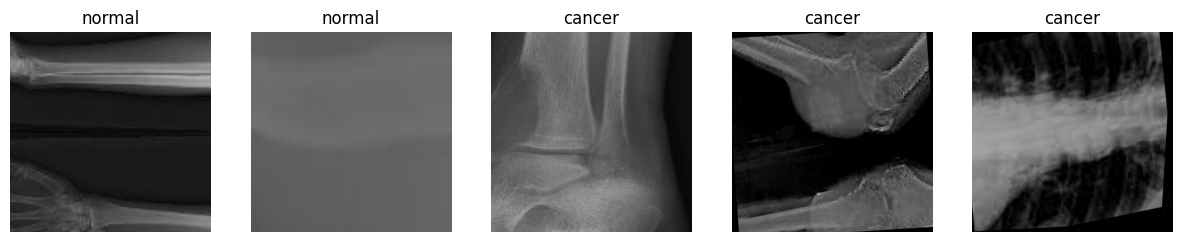

In [ ]:


# Get classes (subfolders) in Train dataset
classes = [i for i in os.listdir(train_dataset) if os.path.isdir(os.path.join(train_dataset, i))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(train_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1,5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
plt.show()


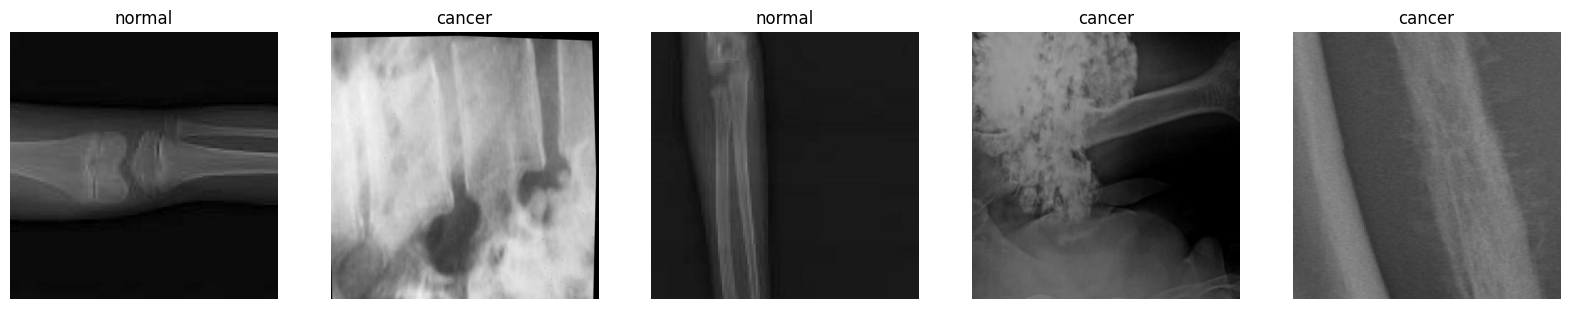

In [ ]:


# Get classes (subfolders) in test dataset
classes = [d for d in os.listdir(test_dataset) if os.path.isdir(os.path.join(test_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(test_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


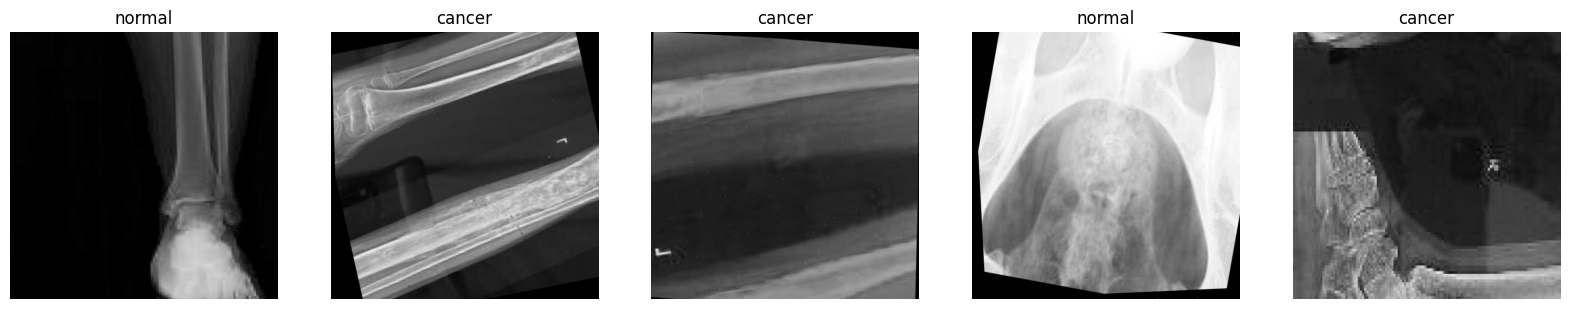

In [ ]:


# Get classes (subfolders) in valid dataset
classes = [d for d in os.listdir(valid_dataset) if os.path.isdir(os.path.join(valid_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(valid_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


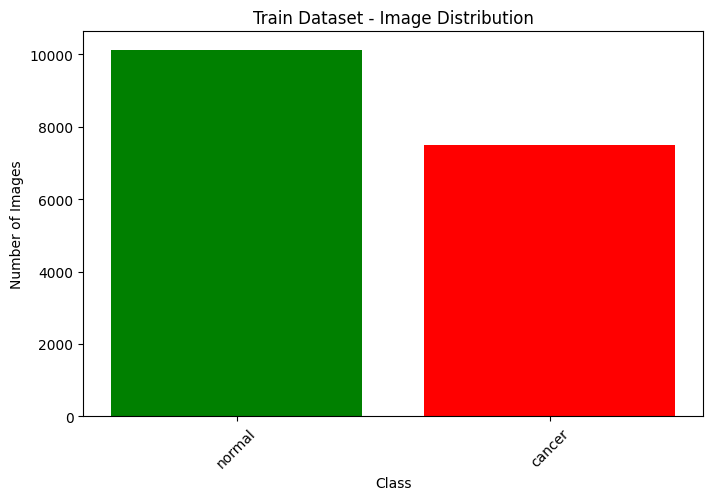

In [ ]:
# Count images in each class (train)
class_counts = {}
for class_name in os.listdir(train_dataset):
    class_path = os.path.join(train_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Train Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



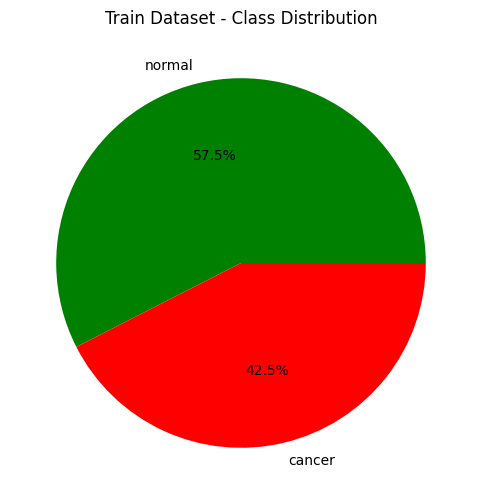

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("Train Dataset - Class Distribution")
plt.show()

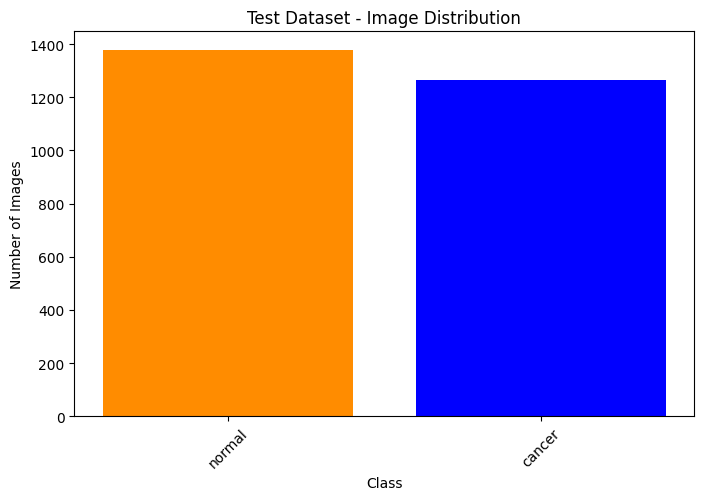

In [ ]:
# Count images in each class (test)
class_counts = {}
for class_name in os.listdir(test_dataset):
    class_path = os.path.join(test_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.values()
plt.bar(class_counts.keys(), class_counts.values(), color=['darkorange','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



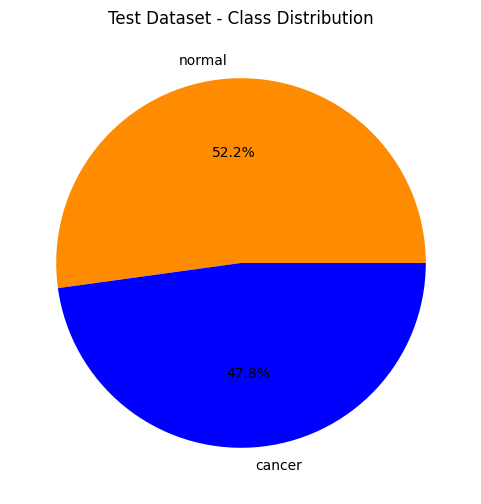

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['darkorange', 'blue'])
plt.title("Test Dataset - Class Distribution")
plt.show()

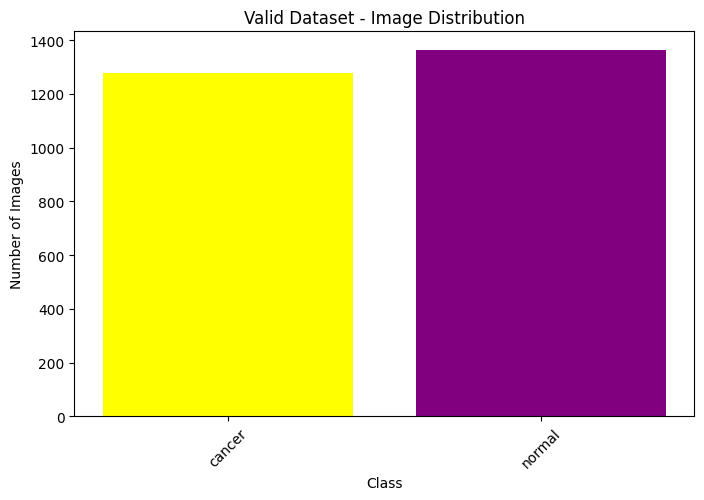

In [ ]:
# Count images in each class (validation)
class_counts = {}
for class_name in os.listdir(valid_dataset):
    class_path = os.path.join(valid_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=[ 'yellow', 'purple'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Valid Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



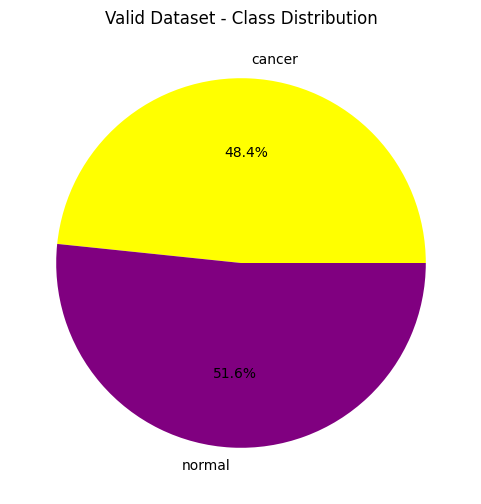

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'purple'])
plt.title("Valid Dataset - Class Distribution")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
def create_dataframe(dataset_path):
    data = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                data.append([os.path.join(class_name, image_file), class_name])  # [image, label]
    return pd.DataFrame(data, columns=['image', 'label'])

train_df = create_dataframe(train_dataset)
test_df = create_dataframe(test_dataset)
valid_df = create_dataframe(valid_dataset)

In [ ]:
image_size = (227, 227)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=train_dataset
)
test_generator = datagen.flow_from_dataframe(
    test_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=test_dataset
)
valid_generator = datagen.flow_from_dataframe(
    valid_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=valid_dataset
)

Found 17617 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.


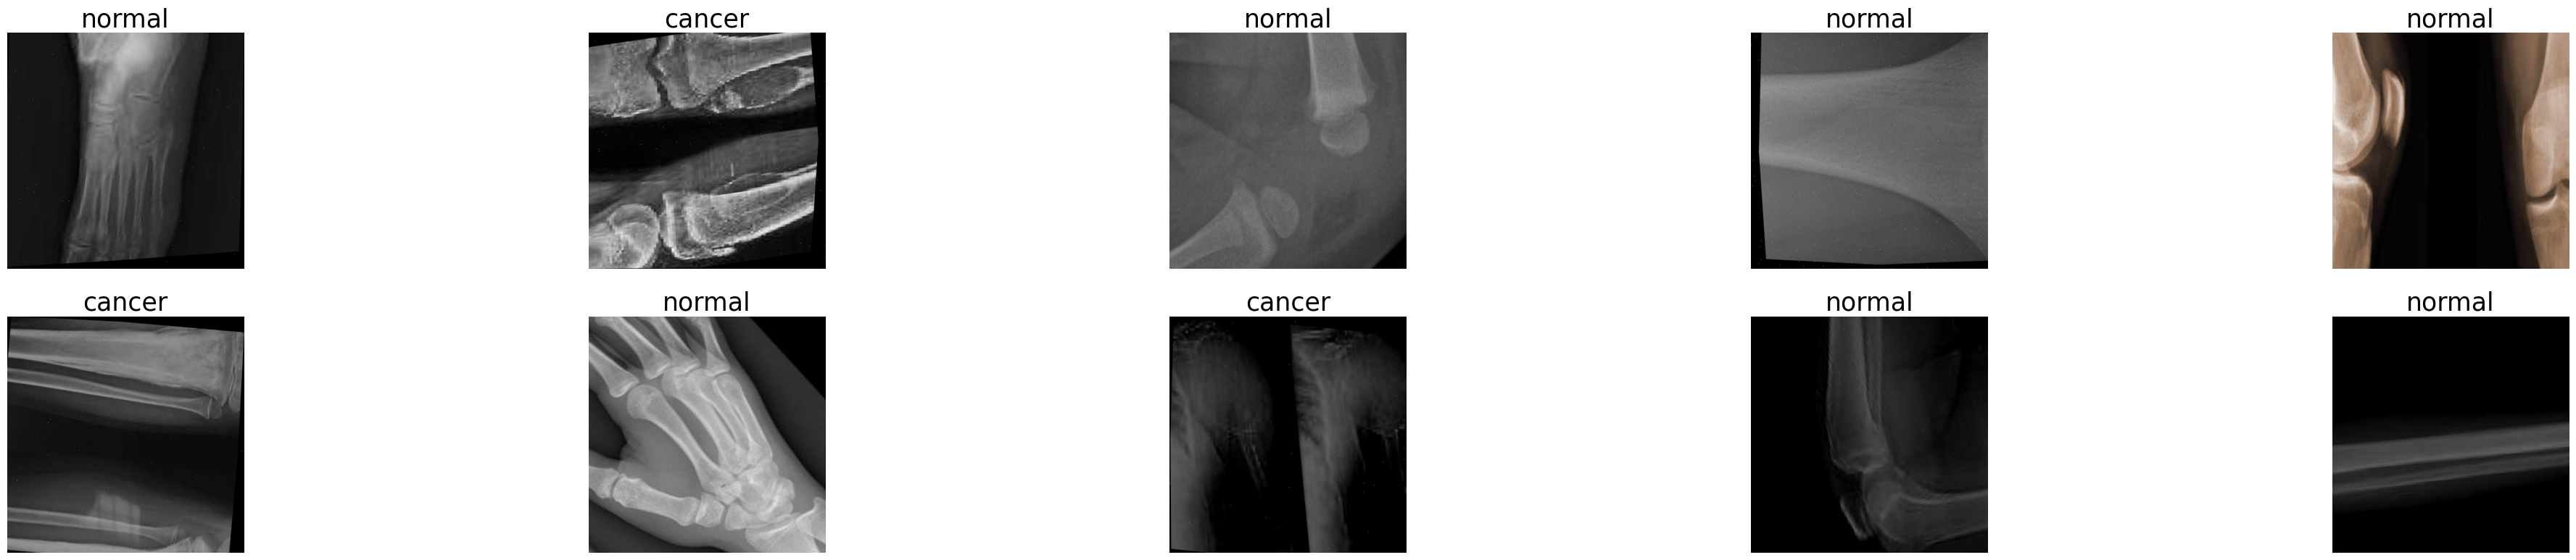

In [ ]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train_df),10)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train_dataset + '/' + train_df.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train_df.label[i],fontsize=25)

In [ ]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

class_num = 1  # Binary classification

model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))

# Fourth Convolutional Layer
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))

# Fifth Convolutional Layer
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,286,849 (222.35 MB)

 Trainable params: 58,286,145 (222.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam # Importing the Adam optimizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics
import  tensorflow.keras as keras


In [ ]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='Adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5),keras.metrics.AUC()])
hist = model.fit(
    train_generator,
    epochs=14,
    validation_data=valid_generator,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6962 - auc: 0.7530 - loss: 2.0335 - specificity_at_sensitivity: 0.8646

551/551 ━━━━━━━━━━━━━━━━━━━━ 4349s 8s/step - accuracy: 0.6963 - auc: 0.7531 - loss: 2.0320 - specificity_at_sensitivity: 0.8647 - val_accuracy: 0.7526 - val_auc: 0.8421 - val_loss: 0.7846 - val_specificity_at_sensitivity: 0.9499
Epoch 2/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 108s 195ms/step - accuracy: 0.7581 - auc: 0.8376 - loss: 0.7308 - specificity_at_sensitivity: 0.9361 - val_accuracy: 0.7177 - val_auc: 0.7892 - val_loss: 0.7867 - val_specificity_at_sensitivity: 0.8936
Epoch 3/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7408 - auc: 0.8130 - loss: 0.7168 - specificity_at_sensitivity: 0.9133

551/551 ━━━━━━━━━━━━━━━━━━━━ 122s 222ms/step - accuracy: 0.7409 - auc: 0.8130 - loss: 0.7168 - specificity_at_sensitivity: 0.9133 - val_accuracy: 0.6969 - val_auc: 0.7425 - val_loss: 0.7444 - val_specificity_at_sensitivity: 0.8873
Epoch 4/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7757 - auc: 0.8500 - loss: 0.6326 - specificity_at_sensitivity: 0.9444

551/551 ━━━━━━━━━━━━━━━━━━━━ 143s 224ms/step - accuracy: 0.7757 - auc: 0.8500 - loss: 0.6326 - specificity_at_sensitivity: 0.9444 - val_accuracy: 0.7605 - val_auc: 0.8604 - val_loss: 0.6146 - val_specificity_at_sensitivity: 0.9546
Epoch 5/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7864 - auc: 0.8691 - loss: 0.5572 - specificity_at_sensitivity: 0.9568

551/551 ━━━━━━━━━━━━━━━━━━━━ 116s 211ms/step - accuracy: 0.7864 - auc: 0.8691 - loss: 0.5571 - specificity_at_sensitivity: 0.9568 - val_accuracy: 0.7628 - val_auc: 0.8956 - val_loss: 0.5500 - val_specificity_at_sensitivity: 0.9789
Epoch 6/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.8009 - auc: 0.8858 - loss: 0.4939 - specificity_at_sensitivity: 0.9638

551/551 ━━━━━━━━━━━━━━━━━━━━ 111s 201ms/step - accuracy: 0.8009 - auc: 0.8858 - loss: 0.4939 - specificity_at_sensitivity: 0.9638 - val_accuracy: 0.7919 - val_auc: 0.8827 - val_loss: 0.5200 - val_specificity_at_sensitivity: 0.9773
Epoch 7/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 115s 208ms/step - accuracy: 0.7970 - auc: 0.8824 - loss: 0.4865 - specificity_at_sensitivity: 0.9587 - val_accuracy: 0.7473 - val_auc: 0.9024 - val_loss: 0.5444 - val_specificity_at_sensitivity: 0.9773
Epoch 8/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.8007 - auc: 0.8855 - loss: 0.4755 - specificity_at_sensitivity: 0.9565

551/551 ━━━━━━━━━━━━━━━━━━━━ 109s 197ms/step - accuracy: 0.8007 - auc: 0.8856 - loss: 0.4755 - specificity_at_sensitivity: 0.9565 - val_accuracy: 0.8475 - val_auc: 0.9265 - val_loss: 0.3958 - val_specificity_at_sensitivity: 0.9820
Epoch 9/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 141s 196ms/step - accuracy: 0.8038 - auc: 0.8937 - loss: 0.4518 - specificity_at_sensitivity: 0.9676 - val_accuracy: 0.8070 - val_auc: 0.9170 - val_loss: 0.5068 - val_specificity_at_sensitivity: 0.9765
Epoch 10/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 115s 209ms/step - accuracy: 0.8107 - auc: 0.9001 - loss: 0.4347 - specificity_at_sensitivity: 0.9708 - val_accuracy: 0.7980 - val_auc: 0.9155 - val_loss: 0.4444 - val_specificity_at_sensitivity: 0.9773
Epoch 11/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 110s 199ms/step - accuracy: 0.8116 - auc: 0.9039 - loss: 0.4136 - specificity_at_sensitivity: 0.9727 - val_accuracy: 0.8074 - val_auc: 0.9169 - val_loss: 0.4319 - val_specificity_at_sensitivity: 0.9765
Epoch 12/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 

551/551 ━━━━━━━━━━━━━━━━━━━━ 126s 228ms/step - accuracy: 0.8153 - auc: 0.9044 - loss: 0.4113 - specificity_at_sensitivity: 0.9699 - val_accuracy: 0.8403 - val_auc: 0.9247 - val_loss: 0.3866 - val_specificity_at_sensitivity: 0.9828
Epoch 14/14
551/551 ━━━━━━━━━━━━━━━━━━━━ 107s 194ms/step - accuracy: 0.8141 - auc: 0.9062 - loss: 0.4078 - specificity_at_sensitivity: 0.9766 - val_accuracy: 0.7968 - val_auc: 0.9234 - val_loss: 0.4647 - val_specificity_at_sensitivity: 0.9781


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,accuracy,auc,loss,specificity_at_sensitivity,val_accuracy,val_auc,val_loss,val_specificity_at_sensitivity
0,0.727195,0.793249,1.163356,0.905436,0.752554,0.842080,0.784572,0.949922
1,0.758472,0.836848,0.704620,0.930012,0.717745,0.789217,0.786651,0.893584
2,0.747063,0.820357,0.709870,0.923200,0.696935,0.742481,0.744434,0.887324
3,0.774082,0.851797,0.621006,0.944036,0.760499,0.860355,0.614574,0.954617
4,0.790316,0.875269,0.535890,0.956859,0.762770,0.895577,0.550036,0.978873
5,0.799001,0.886079,0.491445,0.963136,0.791903,0.882699,0.519983,0.977308
6,0.799966,0.888070,0.474976,0.964739,0.747257,0.902395,0.544384,0.977308
7,0.802464,0.890524,0.463655,0.963003,0.847522,0.926536,0.395786,0.982003
8,0.806834,0.895012,0.446042,0.967677,0.807037,0.917000,0.506799,0.976526
9,0.810127,0.900968,0.428666,0.970749,0.797957,0.915462,0.444402,0.977308


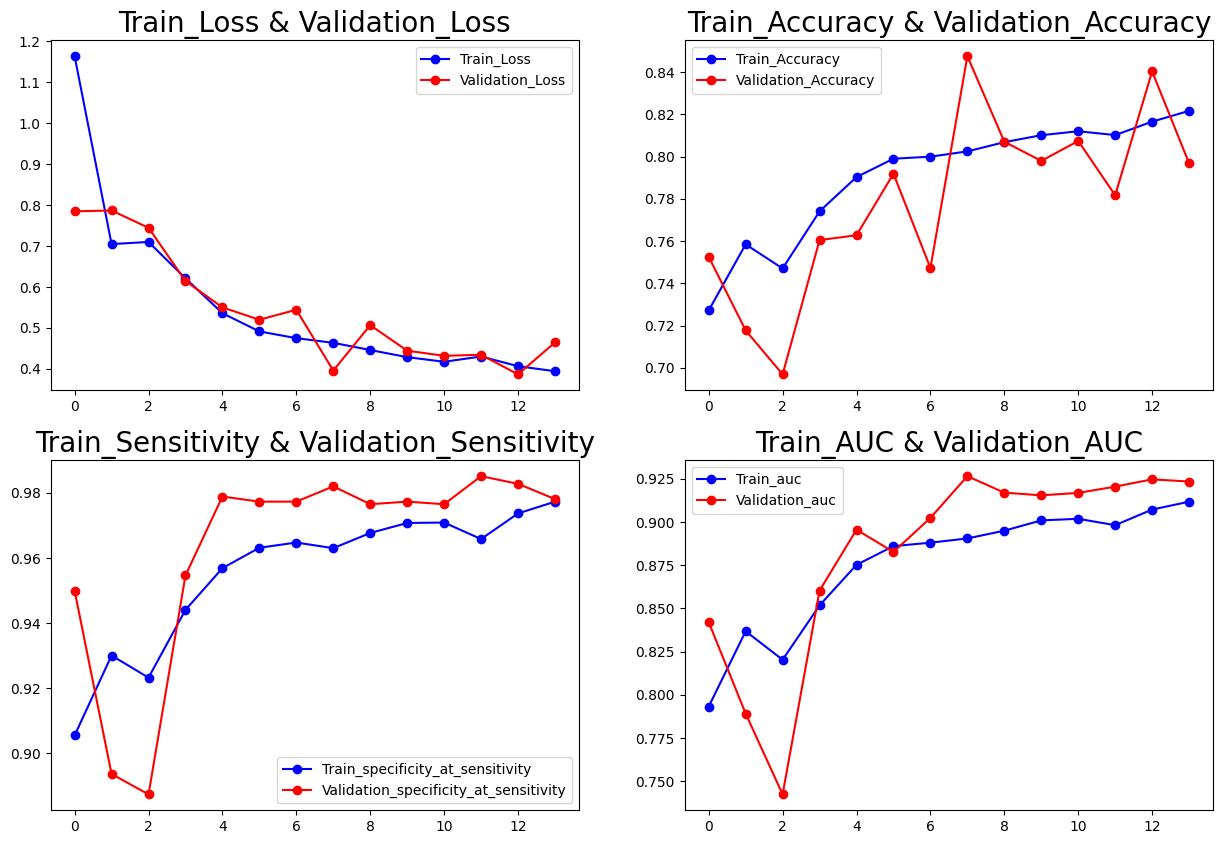

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [ ]:

# Get all the metrics (loss, accuracy, specificity_at_sensitivity, auc)
metrics = model.evaluate(test_generator, verbose=0)

# Assign values to variables
loss = metrics[0]
accuracy = metrics[1]
specificity_at_sensitivity = metrics[2]
auc = metrics[3]

# Print the metrics
print('Test Loss =', loss)
print('Test Accuracy =', accuracy)
print('Test Specificity at Sensitivity =', specificity_at_sensitivity)
print('Test AUC =', auc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss = 0.3914726972579956
Test Accuracy = 0.8369277119636536
Test Specificity at Sensitivity = 0.9802215099334717
Test AUC = 0.9227766394615173


In [ ]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step


,Actual,Prediction
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2638,0,0
2639,0,0
2640,0,0
2641,0,1


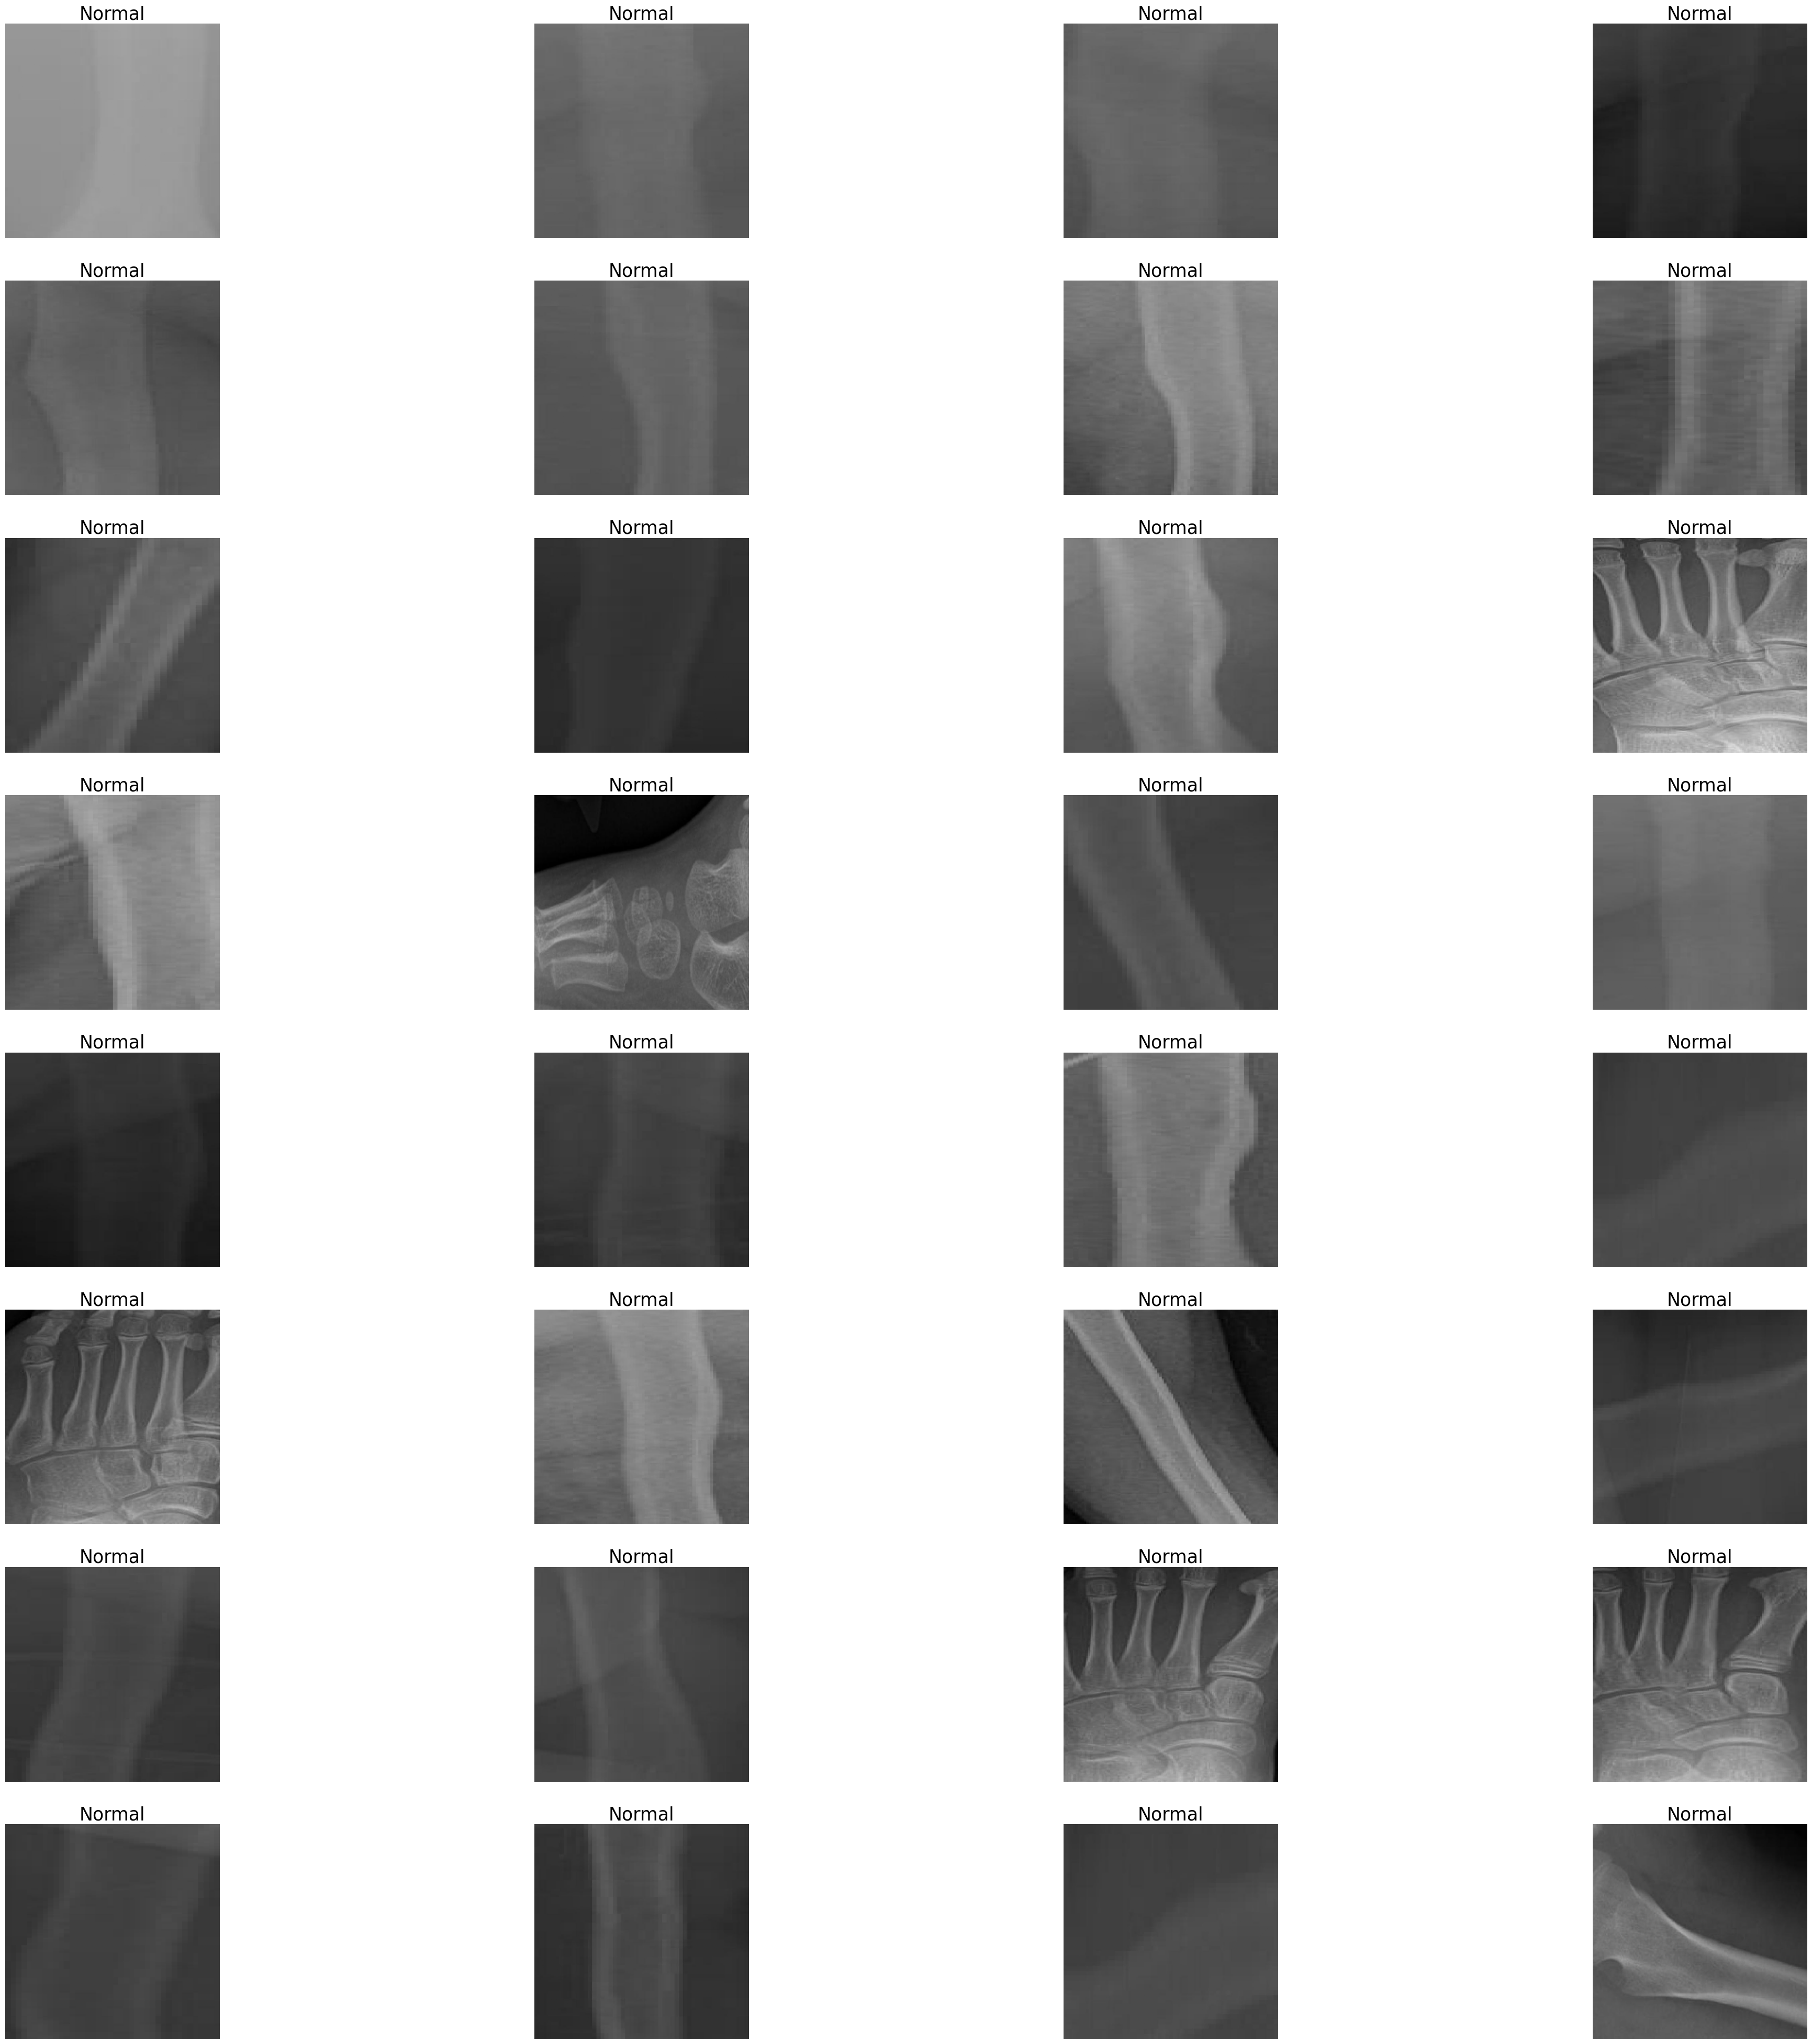

In [ ]:
class_names=['Cancer', 'Normal']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

In [ ]:
# Import the necessary library and function
from sklearn.metrics import classification_report


In [ ]:
# Classification Report
ClassificationReport = classification_report(y_test, y_pred, target_names=['Cancer','Normal'])
print('Classification Report:\n', ClassificationReport)

Classification Report:
               precision    recall  f1-score   support

      Cancer       0.80      0.87      0.84      1264
      Normal       0.87      0.80      0.84      1379

    accuracy                           0.84      2643
   macro avg       0.84      0.84      0.84      2643
weighted avg       0.84      0.84      0.84      2643



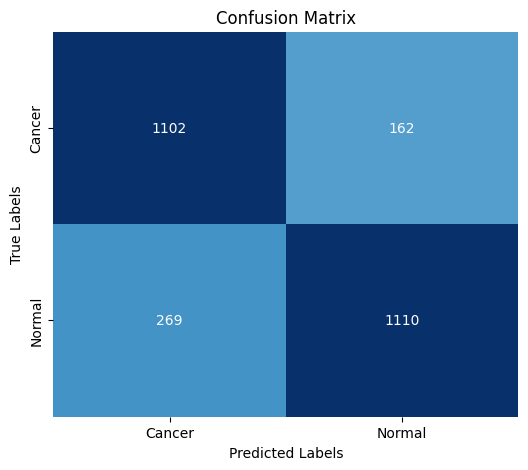

Confusion Matrix:
 [[1102  162]
 [ 269 1110]]


In [ ]:
from sklearn.metrics import confusion_matrix # import the confusion_matrix function
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(CM, fmt='g', center=True, cbar=False, annot=True, cmap='Blues',
            xticklabels=['Cancer', 'Normal'],
            yticklabels=['Cancer', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print('Confusion Matrix:\n', CM)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

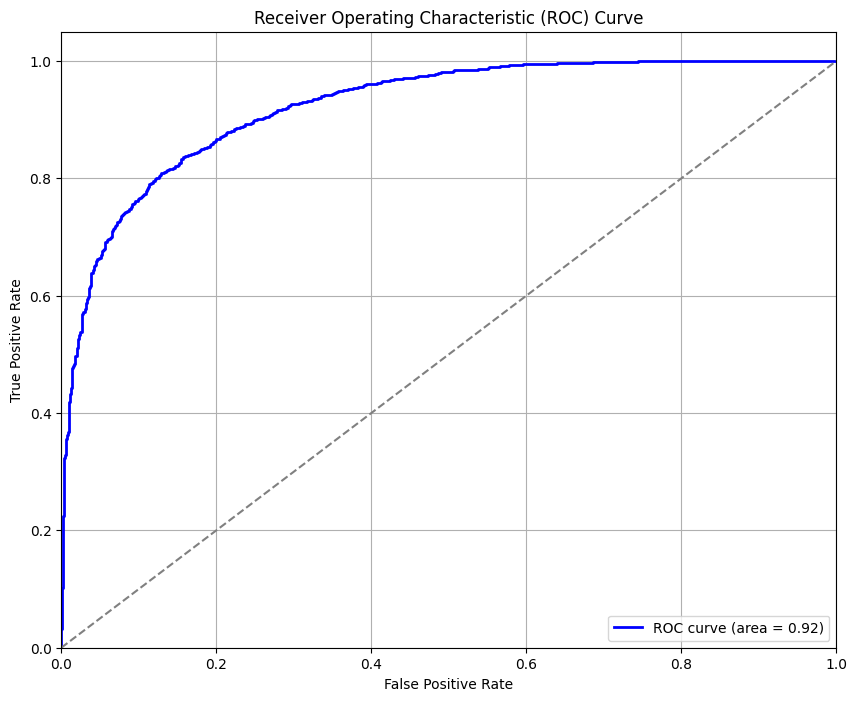

ROC AUC Score: 0.92


In [ ]:
# Import the necessary library and function
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels (if not already)
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()

#Calculate fpr, tpr, and roc_auc
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
print(f'ROC AUC Score: {roc_auc:.2f}')